# Adatok olvasása és statisztika a két mérés adatain


## Nem azt méri -> szakmailag nem jó

## Nem jól kitölthető 
Az eloszlás azonos -> kitöltsé változása azonos

Személyenként a tesztek távolsága (Hemming, cos, euklideszi,...)

In [34]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
file_1 = r"shhs1-dataset-0.14.0.csv"
file_2 = r"shhs2-dataset-0.14.0.csv"
file_3 = r"shhs-interim-followup-dataset-0.14.0.csv"
shhs1 = pd.read_csv(file_1, engine='python')
shhs2 = pd.read_csv(file_2, engine='python')
shhs_inter = pd.read_csv(file_3, engine='python')

In [35]:
shhs = shhs1.merge(shhs2, on="nsrrid")
shhs = shhs.merge(shhs_inter, on="nsrrid")
shhs.columns = map(str.lower, shhs.columns)
shhs

,nsrrid,pptid_x,ecgdate_x,lvh3_1_x,lvh3_3_x,st4_1_3_x,st5_1_3_x,lvhst_x,mob1_x,part2deg_x,...,chfdt,cabgptcadt,carotidenddt,completeddt_stat,readin_stat,ess_interim,visitnumber,gender,race,age_s1
0,200077,77,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,737.0,749.0,4.0,4,1,1,41
1,200078,78,-375.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,809.0,815.0,3.0,4,1,1,54
2,200079,79,356.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,809.0,815.0,9.0,4,2,3,56
3,200080,80,-397.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,777.0,786.0,12.0,4,1,1,54
4,200081,81,2.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,573.0,579.0,1.0,4,2,1,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075,205798,5833,-704.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,580.0,592.0,12.0,4,1,1,59
4076,205799,5834,-907.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,545.0,557.0,12.0,4,2,1,54
4077,205800,5835,-854.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,553.0,561.0,5.0,4,1,1,66
4078,205801,5836,-755.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,632.0,645.0,11.0,4,1,1,54


<AxesSubplot:>

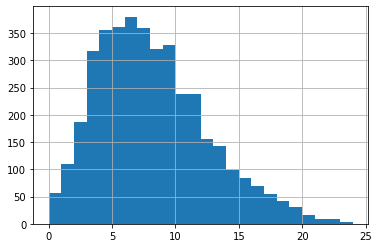

In [36]:
shhs.ess_s1.hist(bins = 24)

<AxesSubplot:>

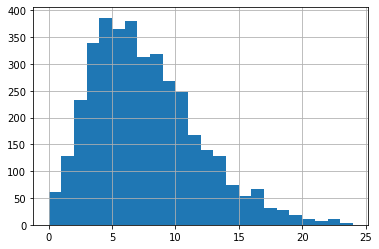

In [38]:
shhs.ess_interim.hist(bins = 24)

<AxesSubplot:>

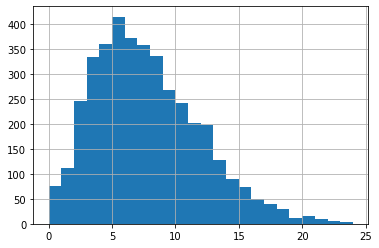

In [37]:
shhs.ess_s2.hist(bins = 24)

## Wilcoxon

In [39]:
from scipy import stats
#w, p = 
stats.wilcoxon(shhs.ess_s1, shhs.ess_s2)

WilcoxonResult(statistic=2338820.5, pvalue=5.6910857139563165e-37)

In [42]:
stats.wilcoxon(shhs.ess_interim, shhs.ess_s2)

WilcoxonResult(statistic=2192366.0, pvalue=7.071771583285873e-43)

In [41]:
stats.wilcoxon(shhs.ess_s1, shhs.ess_interim)

WilcoxonResult(statistic=1890632.0, pvalue=1.049603260873792e-87)

## Kolmogorov-Smirnov 

In [43]:
stats.ks_2samp(shhs.ess_s1, shhs.ess_s2)

KstestResult(statistic=0.03848039215686275, pvalue=0.004752780852290926)

In [44]:
stats.ks_2samp(shhs.ess_interim, shhs.ess_s1)

KstestResult(statistic=0.047058823529411764, pvalue=0.00023772968264865603)

In [45]:
stats.ks_2samp(shhs.ess_interim, shhs.ess_s2)

KstestResult(statistic=0.04877450980392157, pvalue=0.0001214945023617946)

Úgy tűnik nincs eltérés a két mérés eloszlása között. 

# Mérések közti eltérések vizsgálata


In [20]:
import plotly.express as px
fig = px.density_heatmap(shhs, x="ess_s1", y="ess_s2")
fig.show()

In [60]:
fig = px.density_heatmap(shhs, x="ess_s2", y="ess_interim")
fig.show()

In [66]:
import plotly.express as px
fig = px.scatter_3d(shhs.loc[shhs.mdsa02>0,:], x="ess_s1", y="ess_s2", z="ess_interim", color = "mdsa02", opacity=0.3)
fig.show()

In [30]:
import numpy as np

np.nanmean(shhs.ess_s1.values-shhs.ess_s2.values)

0.3965829666062646

In [58]:
np.nanmean(shhs.ess_s1.values-shhs.ess_interim.values)

0.5203915171288744

In [59]:
np.nanmean(-shhs.ess_s2.values+shhs.ess_interim.values)

-0.12248230811105063

(array([2.000e+00, 1.000e+00, 8.000e+00, 9.000e+01, 5.800e+02, 1.855e+03,
        1.165e+03, 1.370e+02, 2.100e+01, 4.000e+00]),
 array([-24. , -19.7, -15.4, -11.1,  -6.8,  -2.5,   1.8,   6.1,  10.4,
         14.7,  19. ]),
 <BarContainer object of 10 artists>)

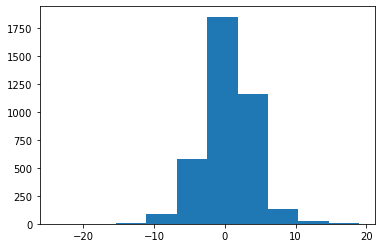

In [31]:
plt.hist(shhs.ess_s1.values-shhs.ess_s2.values)

 # Concordance correlation coefficient

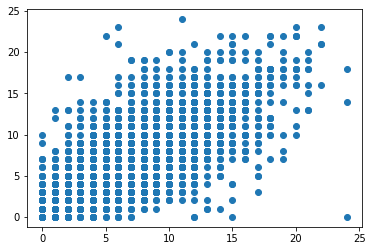

In [154]:
import numpy as np

def concordance_correlation_coefficient(y_true, y_pred,
                       sample_weight=None,
                       multioutput='uniform_average'):
    """Concordance correlation coefficient.
    The concordance correlation coefficient is a measure of inter-rater agreement.
    It measures the deviation of the relationship between predicted and true values
    from the 45 degree angle.
    Read more: https://en.wikipedia.org/wiki/Concordance_correlation_coefficient
    Original paper: Lawrence, I., and Kuei Lin. "A concordance correlation coefficient to evaluate reproducibility." Biometrics (1989): 255-268.  
    Parameters
    ----------
    y_true : array-like of shape = (n_samples) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    y_pred : array-like of shape = (n_samples) or (n_samples, n_outputs)
        Estimated target values.
    Returns
    -------
    loss : A float in the range [-1,1]. A value of 1 indicates perfect agreement
    between the true and the predicted values.
    Examples
    --------
    >>> from sklearn.metrics import concordance_correlation_coefficient
    >>> y_true = [3, -0.5, 2, 7]
    >>> y_pred = [2.5, 0.0, 2, 8]
    >>> concordance_correlation_coefficient(y_true, y_pred)
    0.97678916827853024
    """
    cor=np.corrcoef(y_true,y_pred)[0][1]
    
    mean_true=np.mean(y_true)
    mean_pred=np.mean(y_pred)
    
    var_true=np.var(y_true)
    var_pred=np.var(y_pred)
    
    sd_true=np.std(y_true)
    sd_pred=np.std(y_pred)
    
    numerator=2*cor*sd_true*sd_pred
    
    denominator=var_true+var_pred+(mean_true-mean_pred)**2

    return numerator/denominator

n_samples=1000
y_true = np.arange(n_samples)
y_pred = y_true + 5
plt.scatter(shhs.ess_s2, shhs.ess_interim)


In [155]:
concordance_correlation_coefficient(np.nan_to_num(shhs.ess_s1), np.nan_to_num(shhs.ess_s2))

0.5824460983267877

In [156]:
concordance_correlation_coefficient(np.nan_to_num(shhs.ess_s1), np.nan_to_num(shhs.ess_interim))

0.5788553018519524

In [157]:
concordance_correlation_coefficient(np.nan_to_num(shhs.ess_s2), np.nan_to_num(shhs.ess_interim))

0.5595391936678727

A cikkben ez szerepelt:
"The Rc value for Lin's concordance coefficient was 0.748 (the correlation is poor if the value is less than 0.9)."

# Odds ratio

In [147]:
shhs

,nsrrid,pptid_x,ecgdate_x,lvh3_1_x,lvh3_3_x,st4_1_3_x,st5_1_3_x,lvhst_x,mob1_x,part2deg_x,...,chfdt,cabgptcadt,carotidenddt,completeddt_stat,readin_stat,ess_interim,visitnumber,gender,race,age_s1
0,200077,77,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,737.0,749.0,4.0,4,1,1,41
1,200078,78,-375.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,809.0,815.0,3.0,4,1,1,54
2,200079,79,356.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,809.0,815.0,9.0,4,2,3,56
3,200080,80,-397.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,777.0,786.0,12.0,4,1,1,54
4,200081,81,2.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,573.0,579.0,1.0,4,2,1,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075,205798,5833,-704.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,580.0,592.0,12.0,4,1,1,59
4076,205799,5834,-907.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,545.0,557.0,12.0,4,2,1,54
4077,205800,5835,-854.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,553.0,561.0,5.0,4,1,1,66
4078,205801,5836,-755.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,632.0,645.0,11.0,4,1,1,54


# Az egyes mutatók változásai


In [72]:
shhs_interim_ess = shhs.loc[:,["sitread","watchtv","sitpublic","ridecar","resting","sittalk","sitafterlunch","stoppedcar","atdinner", "whiledriving"]]
shhs_interim_ess

,sitread,watchtv,sitpublic,ridecar,resting,sittalk,sitafterlunch,stoppedcar,atdinner,whiledriving
0,2.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0
2,2.0,2.0,1.0,3.0,4.0,1.0,3.0,1.0,1.0,1.0
3,3.0,3.0,3.0,3.0,4.0,1.0,2.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
4075,3.0,4.0,2.0,1.0,4.0,1.0,4.0,1.0,1.0,1.0
4076,4.0,4.0,1.0,1.0,4.0,1.0,4.0,1.0,1.0,1.0
4077,2.0,3.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0
4078,3.0,4.0,2.0,2.0,4.0,1.0,2.0,1.0,1.0,1.0


In [73]:
shhs_1_ess = shhs.loc[:,["sitrd02","watv02","sitpub02","pgrcar02","lydwn02","sittlk02","sitlch02","incar02","attabl02","drive02"]]
shhs_1_ess

#SitRd02	WaTV02	SitPub02	PgrCar02	LyDwn02	SitTlk02	SitLch02	InCar02	AtTabl02	Drive02
#sh319a	sh319b	sh319c	sh319d	sh319e	sh319f	sh319g	sh319h	sh319i	sh319j
#sitRead	watchTV	sitPublic	rideCar	resting	sitTalk	sitAfterLunch	stoppedCar	atDinner	whileDriving	bpmeds	aspirin	drive
#["sitrd02","watv02","sitpub02","pgrcar02","lydwn02","sittlk02","sitlch02","incar02","attabl02","drive02"]
#["sh319a","sh319b","sh319c","sh319d","sh319e","sh319f","sh319g","sh319h","sh319i","sh319j"]
#["sitread","watchtv","sitpublic","ridecar","resting","sittalk","sitafterLunch","stoppedcar","atdinner", "whiledriving"]

,sitrd02,watv02,sitpub02,pgrcar02,lydwn02,sittlk02,sitlch02,incar02,attabl02,drive02
0,2.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0
1,1.0,2.0,1.0,2.0,4.0,1.0,2.0,1.0,1.0,1.0
2,1.0,1.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0
3,4.0,2.0,3.0,3.0,4.0,1.0,2.0,1.0,1.0,1.0
4,1.0,1.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
4075,1.0,2.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,1.0
4076,2.0,4.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0
4077,2.0,4.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0
4078,3.0,4.0,2.0,3.0,4.0,1.0,2.0,1.0,1.0,1.0


In [74]:
shhs_2_ess = shhs.loc[:,["sh319a","sh319b","sh319c","sh319d","sh319e","sh319f","sh319g","sh319h","sh319i","sh319j"]]
shhs_2_ess

,sh319a,sh319b,sh319c,sh319d,sh319e,sh319f,sh319g,sh319h,sh319i,sh319j
0,4.0,4.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
1,2.0,2.0,1.0,2.0,4.0,1.0,2.0,1.0,1.0,1.0
2,2.0,3.0,1.0,4.0,4.0,1.0,2.0,1.0,1.0,1.0
3,4.0,3.0,3.0,3.0,4.0,1.0,2.0,1.0,1.0,1.0
4,1.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
4075,3.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,1.0,2.0
4076,4.0,4.0,1.0,1.0,4.0,1.0,4.0,1.0,1.0,1.0
4077,3.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0
4078,2.0,4.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0


<BarContainer object of 10 artists>

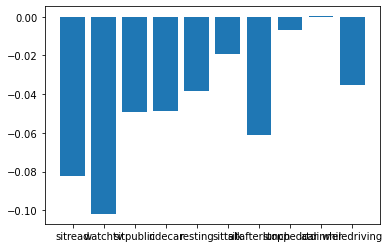

In [81]:
plt.bar(["sitread","watchtv","sitpublic","ridecar","resting","sittalk","sitafterlunch","stoppedcar","atdinner", "whiledriving"],np.nanmean(shhs_2_ess.values-shhs_1_ess.values, axis = 0))

<BarContainer object of 10 artists>

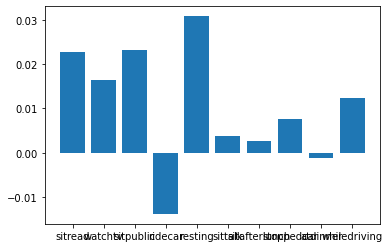

In [83]:
plt.bar(["sitread","watchtv","sitpublic","ridecar","resting","sittalk","sitafterlunch","stoppedcar","atdinner", "whiledriving"],np.nanmean(shhs_2_ess.values-shhs_interim_ess.values, axis = 0))

<BarContainer object of 10 artists>

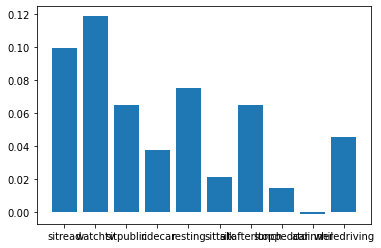

In [84]:
plt.bar(["sitread","watchtv","sitpublic","ridecar","resting","sittalk","sitafterlunch","stoppedcar","atdinner", "whiledriving"],np.nanmean(shhs_1_ess.values-shhs_interim_ess.values, axis = 0))

# Távolságok

## Cos

In [102]:
import scipy.spatial as sp
cos_dist_m = 1-sp.distance.cdist(shhs_1_ess.values,shhs_interim_ess.values, 'cosine')

In [159]:
from scipy import spatial

cos_dist = []
euclidean_dist = []
mod_euclidean_dist = []
mink_dist = []

for i in range(shhs_1_ess.shape[0]):
    cos_dist.append(1 - spatial.distance.cosine(shhs_1_ess.values[i,:],shhs_interim_ess.values[i,:]))
    euclidean_dist.append(spatial.distance.euclidean(np.nan_to_num(shhs_1_ess.values[i,:]),np.nan_to_num(shhs_interim_ess.values[i,:])))
    mod_euclidean_dist.append(spatial.distance.euclidean(np.nan_to_num(shhs_1_ess.values[i,:])**3,np.nan_to_num(shhs_interim_ess.values[i,:])**3))
    mink_dist.append(spatial.distance.minkowski(np.nan_to_num(shhs_1_ess.values[i,:]),np.nan_to_num(shhs_interim_ess.values[i,:]),10))

print("Cos távolság:")    
print(np.nanmean(cos_dist))
print("\nEuklideszi távolság:")
print(np.nanmean(euclidean_dist))
print("\nBence féle módosított távolság:")
print(np.nanmean(mod_euclidean_dist))
print("\nMinkowski távolság:")
print(np.nanmean(mink_dist))

Cos távolság:
0.9552493495583483

Euklideszi távolság:
2.391918651395364

Bence féle módosított távolság:
40.471321229465424

Minkowski távolság:
1.6118925049696393


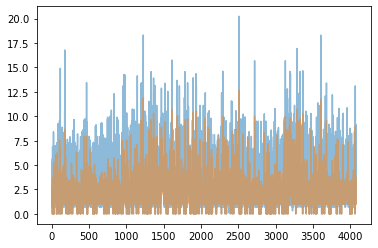

In [146]:
plt.plot(np.array(mod_euclidean_dist)/10, alpha = 0.5)
plt.plot(euclidean_dist, alpha = 0.5)

# Lineáris regresszió

BMI + ESS + kor és RDI (espiratory disturbance index) kapcsolata

In [188]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.nan_to_num(shhs.loc[:,["sitrd02","watv02","sitpub02","pgrcar02","lydwn02","sittlk02","sitlch02","incar02","attabl02","drive02", "age_s1", "bmi_s1"]].values)
# y = 1 * x_0 + 2 * x_1 + 3
y = np.nan_to_num(shhs.loc[:,['rdi0p_x']].values)
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))

print(reg.coef_)

dict(zip(list(reg.coef_.flatten()), ["sitrd02","watv02","sitpub02","pgrcar02","lydwn02","sittlk02","sitlch02","incar02","attabl02","drive02", "age_s1", "bmi_s1"]))

0.11026019907963913
[[ 0.48739743  0.41460398  1.02845832 -1.35669726  0.10593086  0.96555673
   0.85838249  0.68690417 -1.47967041  1.74115315  0.27516322  1.01759849]]


{0.4873974272424685: 'sitrd02',
 0.41460397638945823: 'watv02',
 1.0284583202648536: 'sitpub02',
 -1.3566972621189712: 'pgrcar02',
 0.10593086103595721: 'lydwn02',
 0.9655567311351835: 'sittlk02',
 0.8583824908129789: 'sitlch02',
 0.6869041703981125: 'incar02',
 -1.4796704102060994: 'attabl02',
 1.7411531490914134: 'drive02',
 0.2751632168124805: 'age_s1',
 1.0175984855450997: 'bmi_s1'}

In [194]:
X = np.nan_to_num(shhs.loc[:,["sh319a","sh319b","sh319c","sh319d","sh319e","sh319f","sh319g","sh319h","sh319i","sh319j", "age_s2", "bmi_s2"]].values)
# y = 1 * x_0 + 2 * x_1 + 3
y = np.nan_to_num(shhs.loc[:,['rdi0p_y']].values)
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))

print(reg.coef_)

dict(zip(list(reg.coef_.flatten()), ["sitrd02","watv02","sitpub02","pgrcar02","lydwn02","sittlk02","sitlch02","incar02","attabl02","drive02", "age_s2", "bmi_s2"]))

0.13395572679186651
[[ 0.86423784  0.2473459   0.60348232 -0.0982708   0.961688   -0.17762223
   0.26377582 -1.52174295 -1.71346976  2.08210245  0.16314456  0.65863896]]


{0.8642378383712407: 'sitrd02',
 0.24734589694100512: 'watv02',
 0.6034823246435668: 'sitpub02',
 -0.09827079913534006: 'pgrcar02',
 0.9616880047310314: 'lydwn02',
 -0.17762223286898232: 'sittlk02',
 0.26377582458674703: 'sitlch02',
 -1.5217429525999815: 'incar02',
 -1.7134697614769507: 'attabl02',
 2.082102449783908: 'drive02',
 0.1631445567303398: 'age_s2',
 0.6586389647869004: 'bmi_s2'}

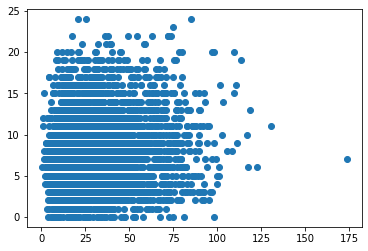

In [168]:
plt.scatter(shhs.rdi0p_x, shhs.ess_s1)